# **1 - PRÉAMBULE**

## **1.1 - PRISE EN MAIN**
>Ce fichier est un "**Jupyter Notebook**", format de plus en plus utilisé dans le traitement des données. Il contient :
  - des cellules de texte (cette cellule par exemple) mis en forme, pouvant contenir des images, des liens...
  - des cellules de code (précédées par **In[ ]**) écrites en Python, et exécutées au sein du fichier, sans éditeur Python externe  

<u>**NB**</u> : 
   - pour **exécuter une cellule de code**, faire la combinaison de touches au clavier **CTRL** et **Entrée**, ou cliquer dans la cellule puis sur **Run** dans la barre de menus (voir illustration ci-dessous) :
![](https://i.goopics.net/673odb.jpg)
   - pour **afficher les numéros de ligne** : menu Affichage / Afficher-Masquer les numéros de ligne

## **1.2 - OBJECTIFS DE CE TP**
>Le TP réalisé précédemment a permis de mesurer l'absorbance $A$ d'un composé en fonction de sa concentration $C$ en $mol.L^{-1}$.

> Le présent TP vise à exploiter ces données :
  - en réalisant une représentation graphique sous forme de nuage de points
  - en cherchant à établir une relation (de type polynomiale) entre $A$ et $C$, à l'aide de **la méthode des moindres carrés**:
    - on dispose d'un nuage de points que l'on cherche à approcher "au mieux" par la courbe d'une fonction affine, polynôme, exponentielle, etc :
    ![](https://i.goopics.net/oxymh7.jpg)
    - <u>*la méthode des moindres carrés*</u> permet de déterminer une fonction qui minimise la somme des carrés des écarts entre les valeurs réelles et les valeurs données par la fonction ("*modèle*")
    - le <u>*coefficient de corrélation*</u> $R$ permet d'estimer la justesse d'un modèle : plus $|R|$ est proche de 1, meilleur est ce modèle.
  
  
Pour plus d'informations : http://serge.mehl.free.fr/anx/meth_carr.html


***

# **2 - REPRESENTATION DU NUAGE**

> La cellule de code Python ci-dessous va permettre de représenter, sous forme d'un *nuage de points*, les données recueillies lors du TP précédent.

> <u>**Travail à faire**</u> :
  - Compléter les lignes 4 et 5 avec les valeurs de C et de A
  - Exécuter la cellule (voir préambule)

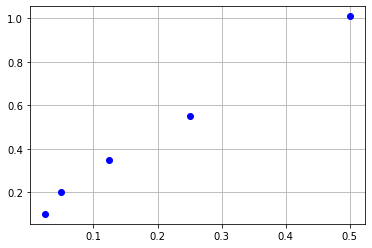

In [1]:
# Tracé du nuage de points
from matplotlib.pyplot import *

C=[0.5,0.25,0.125,0.05,0.025]                    # liste des valeurs de la concentration séparées par des virgules
A=[1.01,0.55,0.35,0.2,0.10]                    # liste des valeurs de l'absorbance séparées par des virgules
plot(C,A,'bo')          # tracé du nuage
grid()                  # affichage de la grille sur le graphique
show()                  # affichage du graphique


***

# **3 - MODELISATION**


> ## **3.1 Loi**
Le nuage de points tracé précédemment suggère une relation linéaire entre entre $C$ et $A$, du type : $A=a \times C$ .

> <u>**Travail à faire**</u> :
- Compléter la cellule ci-dessous en rappelant la loi mettant en relation l'absorbance $A$ d'une solution avec la concentration $C$ de l'espèce colorée dans cette solution (double-cliquez ci-dessous) :

Réponse : C'est la loi de Beer-Lambert : A = l x epsilon x C

> ## **3.2 Calcul du modèle**

> - Les instructions ci-dessous permettent de déterminer (par la méthode des moindres carrés) la fonction affine $f$ entre une série de données $x$ et une série de données $y$, telle que : $y=f(x)$
```
from numpy import *
coeff=polyfit(x,y,1)       # calcul des coefficients a et b de la fonction affine telle que y=f(x)
f=poly1d(coeff)            # création de la fonction f
print(f)                   # affichage de f(x)
```

> - Les instructions ci-dessous permettent de calculer le coefficient de corrélation linéaire (dit de "Pearson") entre $x$ et $y$ :
```
from scipy.stats import pearsonr
R=pearsonr(x,y)[0]
```

> - Les instructions ci-dessous permettent de tracer la courbe d'une fonction :
```
x=arange(xmin,xmax,p)         # liste de valeurs variant entre xmin et xmax avec un "pas" égal à p
plot(x,f(x))
```

> <u>**Travail à faire**</u> :
1. En utilisant les instructions précédentes, compléter la cellule ci-dessous pour calculer et afficher la fonction affine $f$ reliant les valeurs de $C$ et de $A$, puis exécuter la cellule :

In [2]:
# Calcul du modèle affine
from numpy import *
coeff=polyfit(C,A,1)      
f=poly1d(coeff)            
print(f)  


 
1.85 x + 0.09055


> <u>**Travail à faire**</u> :
2. En utilisant les instructions précédentes, compléter la cellule ci-dessous pour calculer et afficher $R$, puis exécuter la cellule :

In [3]:
# Calcul du modèle affine
from scipy.stats import pearsonr
R=pearsonr(C,A)[0]
print(R)


0.9976076329340784


> ## **3.3 Représentation du modèle avec le nuage de points**

> <u>**Travail à faire**</u> :
- Recopier les lignes de code de la partie 2 (représentation du nuage), et les compléter pour obtenir sur le même graphique le nuage de points ainsi que la courbe de la fonction $f$ déterminée précédemment (voir instructions au début de la partie 3.2), puis exécuter la cellule :


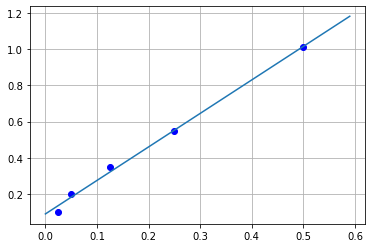

In [5]:
C=[0.5,0.25,0.125,0.05,0.025]                    # liste des valeurs de la concentration séparées par des virgules
A=[1.01,0.55,0.35,0.2,0.10]                    # liste des valeurs de l'absorbance séparées par des virgules
plot(C,A,'bo')          # tracé du nuage
         
x=arange(0,0.6,0.01)         # liste de valeurs variant entre xmin et xmax avec un "pas" égal à p
plot(x,f(x))

grid() 
show()


> ## **3.4 Utilisation du modèle**


> Le modèle précédent permet d'estimer l'absorbance $A$ de cette solution pour d'autres valeurs de la concentration $C$ non mesurées en TP.

> <u>**Travail à faire**</u> :
1. Utiliser la cellule de code ci-dessous, ainsi que la fonction f, pour déterminer l'absorbance d'une solution dont la concentration est de ... , puis exécuter la cellule :

In [6]:
print(f(0.35))


0.7379601990049751


> 2. Faire de même pour déterminer l'absorbance d'une solution dont la concentration est de ... , puis exécuter la cellule :

In [7]:
print(f(0.15))


0.36800995024875627
